<a href="https://colab.research.google.com/github/aishwaryabadge/Lead-scoring-case-study/blob/main/Lead_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
warnings.filterwarnings("ignore")

# Import and Inspect of data

In [ ]:
leads_df = pd.read_csv("/content/drive/MyDrive/Data Science projects/Lead Score case study/Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Shape:

In [ ]:
original_shape = leads_df.shape
original_shape

(9240, 37)

### Dtype and Count info : 

In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Summary statistics

In [ ]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data cleaning and Preparation

## Replace all `Select` values with `NaN`

In [ ]:
(leads_df == "Select").sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
leads_df.replace("Select",np.nan,inplace=True)

## Check for null values

In [ ]:
round(leads_df.isnull().mean()*100,2).astype("str")+"%"

Prospect ID                                        0.0%
Lead Number                                        0.0%
Lead Origin                                        0.0%
Lead Source                                       0.39%
Do Not Email                                       0.0%
Do Not Call                                        0.0%
Converted                                          0.0%
TotalVisits                                       1.48%
Total Time Spent on Website                        0.0%
Page Views Per Visit                              1.48%
Last Activity                                     1.11%
Country                                          26.63%
Specialization                                   36.58%
How did you hear about X Education               78.46%
What is your current occupation                  29.11%
What matters most to you in choosing a course    29.32%
Search                                             0.0%
Magazine                                        

### Drop columns with more than 40% of missing values

In [ ]:
leads_df.loc[:,leads_df.isnull().mean()>=0.40].columns

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [ ]:
leads_df = leads_df.loc[:,leads_df.isnull().mean()<0.40]

## Skewness of categorical variables

Following snippet returns the columns that are highly skewed

In [ ]:
skewed_cols = np.array([np.any(leads_df[col].value_counts(normalize = True)>=0.99) for col in leads_df.columns])
leads_df.loc[:,skewed_cols].columns

Index(['Do Not Call', 'What matters most to you in choosing a course',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

### Remove the columns that are highly skewed

In [ ]:
leads_df = leads_df.loc[:,~skewed_cols]

### Remove ID columns like prospect ID and Lead Number

In [ ]:
leads_df.drop(columns=["Prospect ID","Lead Number"],inplace=True)

### Remove Sales team generated columns like Tags, Last Activity and Last Notable Activity

In [ ]:
leads_df.drop(columns=["Tags","Last Activity","Last Notable Activity"],inplace=True)

## Impute Null values

In [ ]:
leads_df.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Country                                   2461
Specialization                            3380
What is your current occupation           2690
City                                      3669
A free copy of Mastering The Interview       0
dtype: int64

In [ ]:
leads_df.fillna({"Specialization":leads_df['Specialization'].mode()[0],
                "What is your current occupation":"Other",
                "City":leads_df["City"].mode()[0],
                "Page Views Per Visit":leads_df["Page Views Per Visit"].median(),
                "TotalVisits":leads_df["TotalVisits"].median(),
                "Lead Source":leads_df["Lead Source"].mode()[0],
                "Country":leads_df["Country"].mode()[0]}, inplace= True)

In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Country                                 9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

## Combine levels with very less count

In [ ]:
leads_df["Lead Origin"].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [ ]:
leads_df["Lead Origin"].replace(["Lead Add Form","Lead Import","Quick Add Form"],"Other",inplace=True)

In [ ]:
leads_df["Lead Source"].value_counts(normalize=True)

Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [ ]:
leads_df["Lead Source"].replace([
       'Welingak Website', 'Referral Sites', 'Facebook', 'Click2call',
       'google', 'bing', 'Press_Release', 'Social Media', 'Live Chat',
       'youtubechannel', 'WeLearn', 'NC_EDM', 'welearnblog_Home',
       'Pay per Click Ads', 'testone', 'blog'], "Other",inplace = True)

In [ ]:
leads_df["Specialization"].value_counts(normalize=True)

Finance Management                   0.471429
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [ ]:
leads_df["Specialization"].replace(['IT Projects Management',
       'Supply Chain Management', 'Banking, Investment And Insurance',
       'Media and Advertising', 'Travel and Tourism', 'International Business',
       'Healthcare Management', 'Hospitality Management', 'E-COMMERCE',
       'Retail Management', 'Rural and Agribusiness', 'E-Business',
       'Services Excellence'],"Other",inplace = True)

In [ ]:
leads_df["What is your current occupation"].value_counts(normalize = True)

Unemployed              0.606061
Other                   0.292857
Working Professional    0.076407
Student                 0.022727
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [ ]:
leads_df["What is your current occupation"].replace(['Student', 'Housewife',
       'Businessman'],"Other", inplace = True)

In [ ]:
leads_df["City"].value_counts(normalize = True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [ ]:
leads_df["City"].replace(['Other Cities',
       'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'],"Other",inplace = True)

In [ ]:
leads_df["A free copy of Mastering The Interview"].value_counts(normalize = True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

In [ ]:
leads_df["Country"].value_counts(normalize = True)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
China                   0.000216
Asia/Pacific Region     0.000216
Uganda                  0.000216
Bangladesh              0.000216
Italy                   0.000216
Belgium                 0.000216
Netherlands             0.000216
Ghana                   0.000216
Philippines             0.000216
Russia                  0.000108
Switzerland             0.000108
Vietnam   

In [ ]:
leads_df["Country"].replace(['United States', 'United Arab Emirates', 'Singapore',
       'Saudi Arabia', 'United Kingdom', 'Qatar', 'Australia', 'Bahrain',
       'Oman', 'France', 'Hong Kong', 'Nigeria', 'Kuwait', 'unknown',
       'South Africa', 'Canada', 'Germany', 'Uganda', 'Bangladesh', 'Ghana',
       'Italy', 'China', 'Philippines', 'Asia/Pacific Region', 'Sweden',
       'Belgium', 'Switzerland', 'Kenya', 'Liberia', 'Vietnam', 'Denmark',
       'Russia', 'Malaysia', 'Netherlands', 'Tanzania'],"Other",inplace = True)

## Handle Outliers

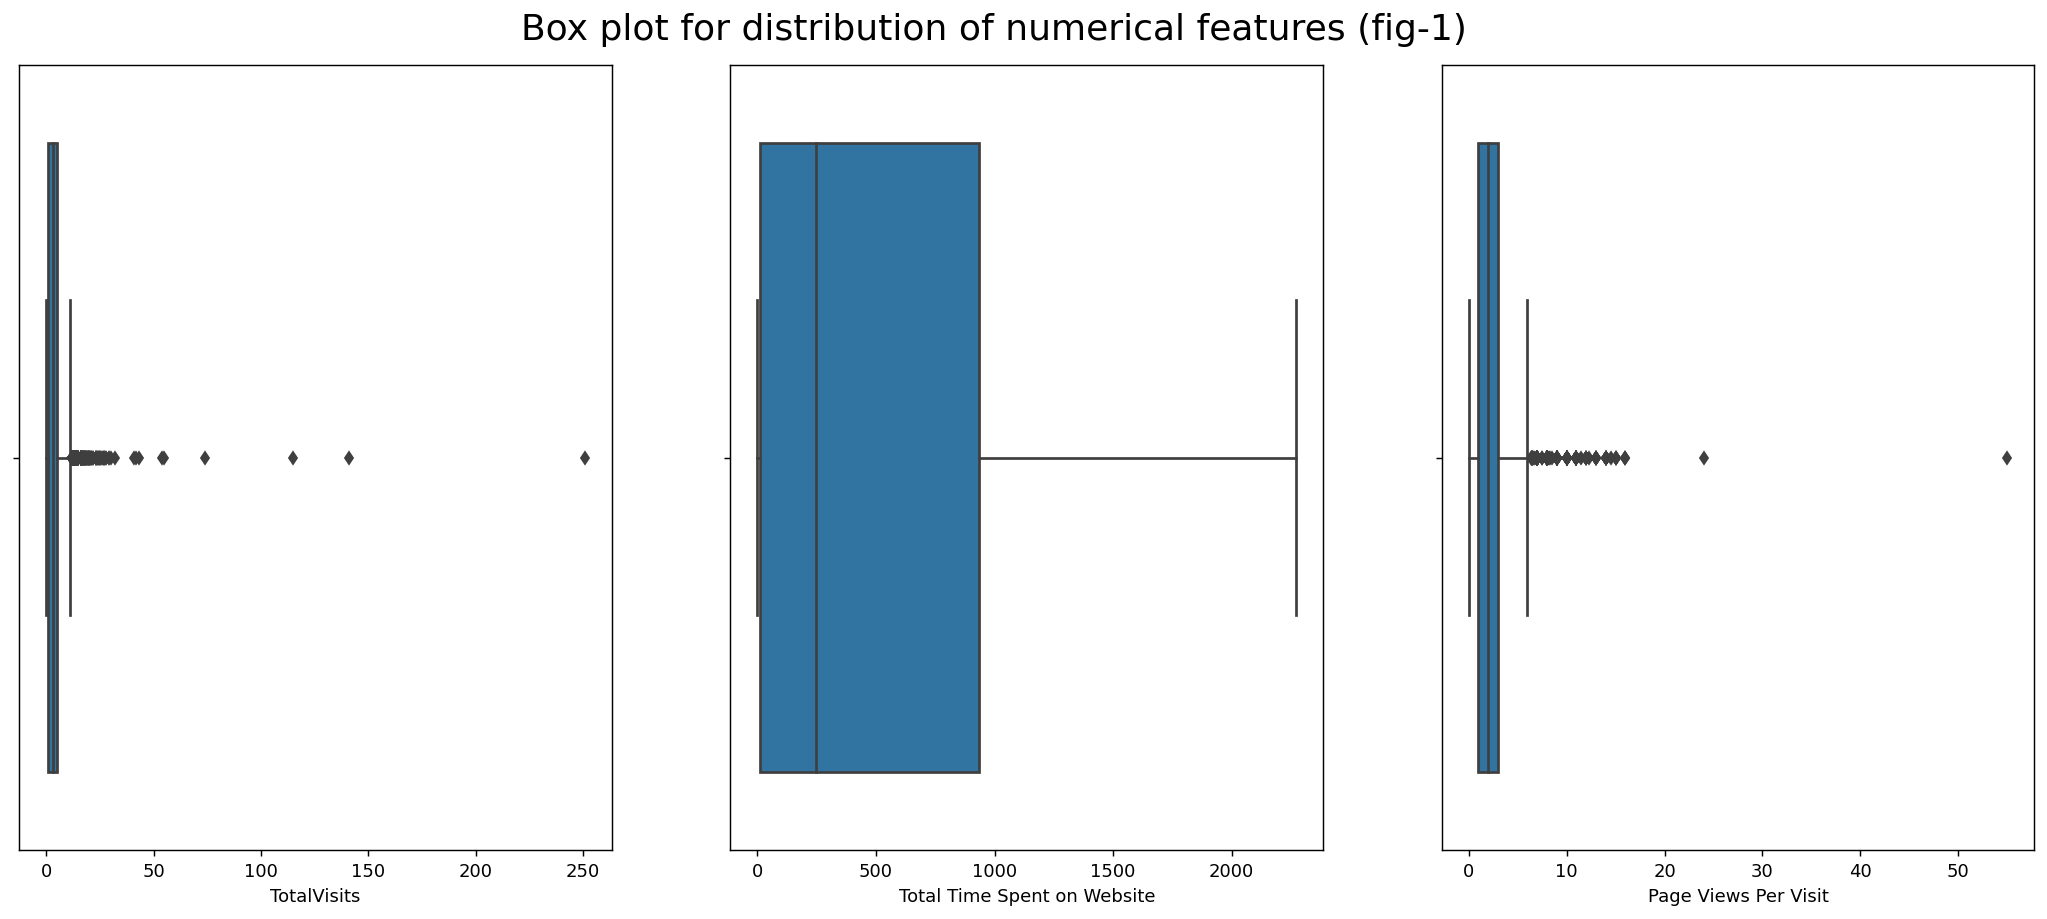

In [ ]:
num_features = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

plt.figure(figsize=(20,8),dpi=130)
plt.suptitle("Box plot for distribution of numerical features (fig-1)",fontsize=20,y=0.93)
for i,col_name in enumerate(num_features):
    plt.subplot(1,3,i+1)
    sns.boxplot(leads_df[col_name])
plt.show()

#### From fig-1 we can see that:
- TotalVisits and Page Viewes Per Visit are having some outliers towards the outer ends.
- As this count not very high we can drop these rows

In [ ]:
outer_limit = leads_df["TotalVisits"].quantile(0.75)*1.5
leads_df = leads_df[leads_df["TotalVisits"]<outer_limit]

In [ ]:
outer_limit = leads_df["Page Views Per Visit"].quantile(0.75)*1.5
leads_df = leads_df[leads_df["Page Views Per Visit"]<outer_limit]

## Rows and Columns retained after cleaning

In [ ]:
print("Rows retained : "+str(round(leads_df.shape[0]/original_shape[0]*100,2))+"%")
print("Columns retained : "+str(round(leads_df.shape[1]/original_shape[1]*100,2))+"%")
leads_df.shape

Rows retained : 81.72%
Columns retained : 32.43%


(7551, 12)

# EDA

## Univariate Analysis

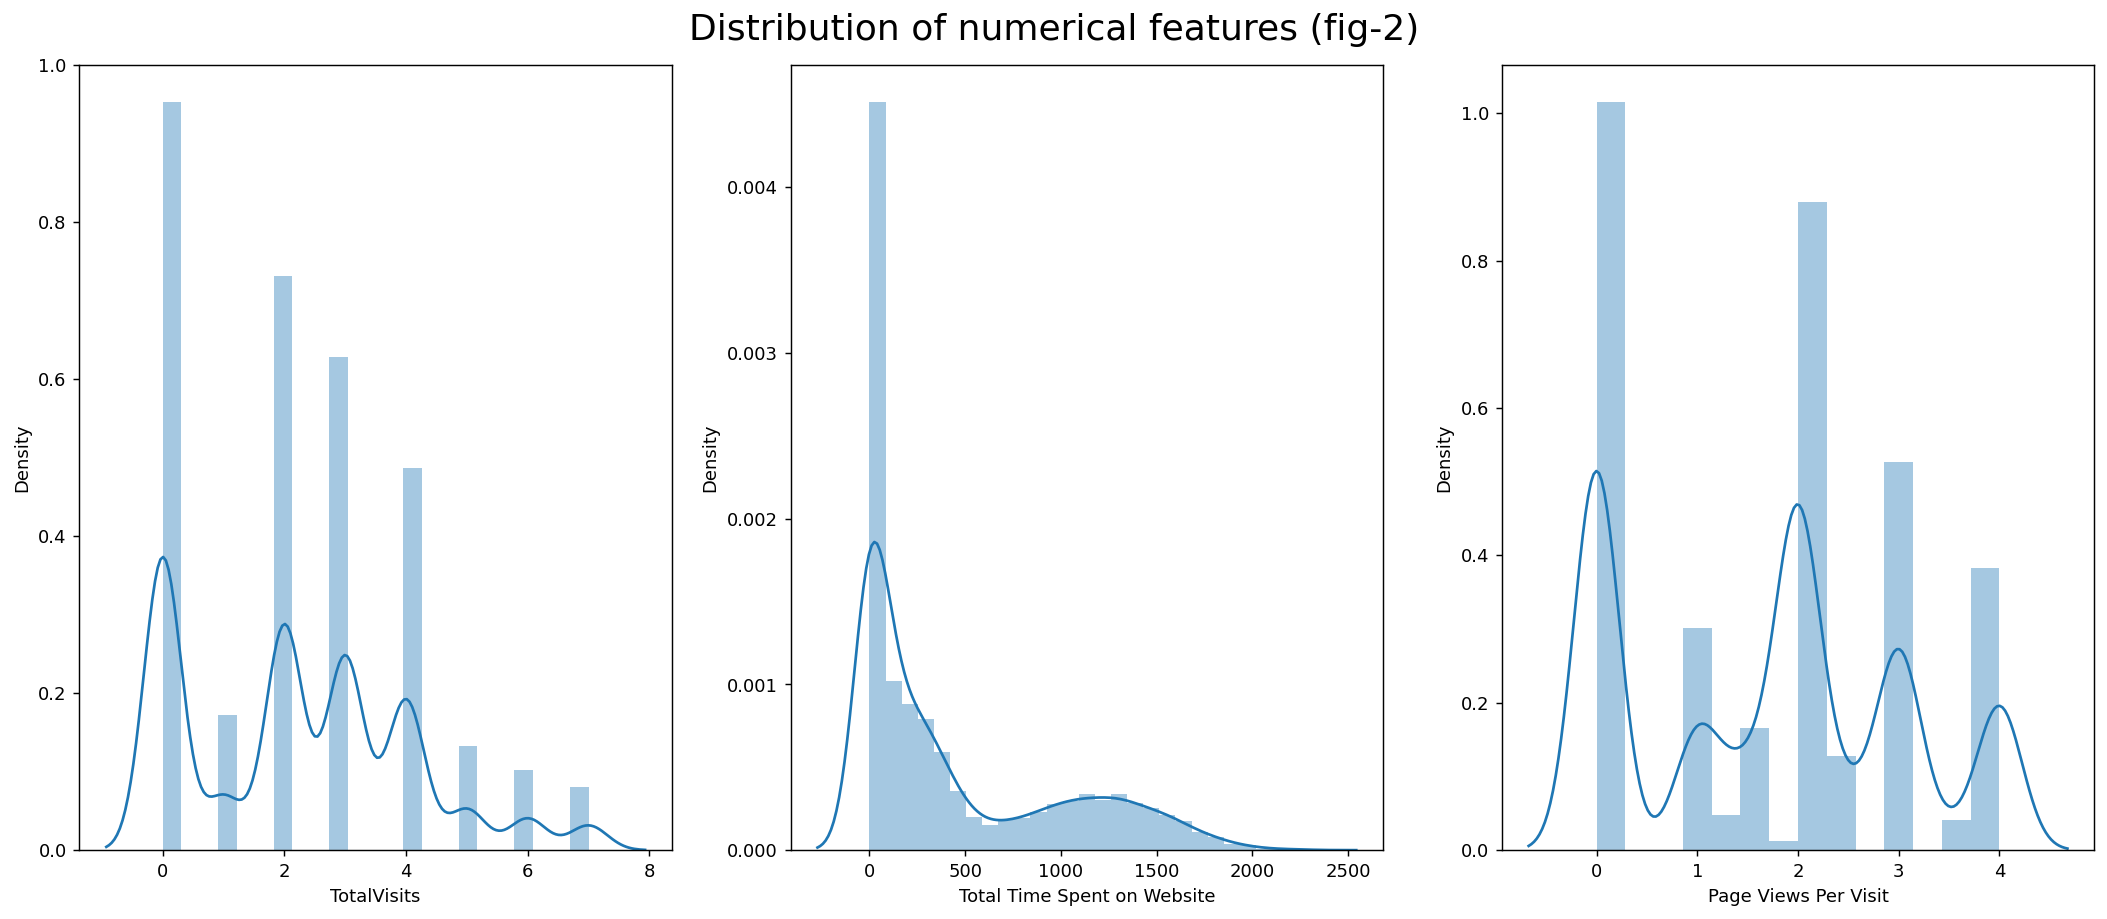

In [ ]:
plt.figure(figsize=(20,8),dpi=130)
plt.suptitle("Distribution of numerical features (fig-2)",fontsize=20,y=0.93)
for i,col_name in enumerate(num_features):
    plt.subplot(1,3,i+1)
    sns.distplot(leads_df[col_name])
plt.show()

#### From fig-2 we can see that :
- Customers who have not visited the website even once are the highest in numbers.
- We can see two clusters of customers based on total times spent on webiste : 0 to 500 and 500 to 2000.
- Pages viewed per visit is highly irregular

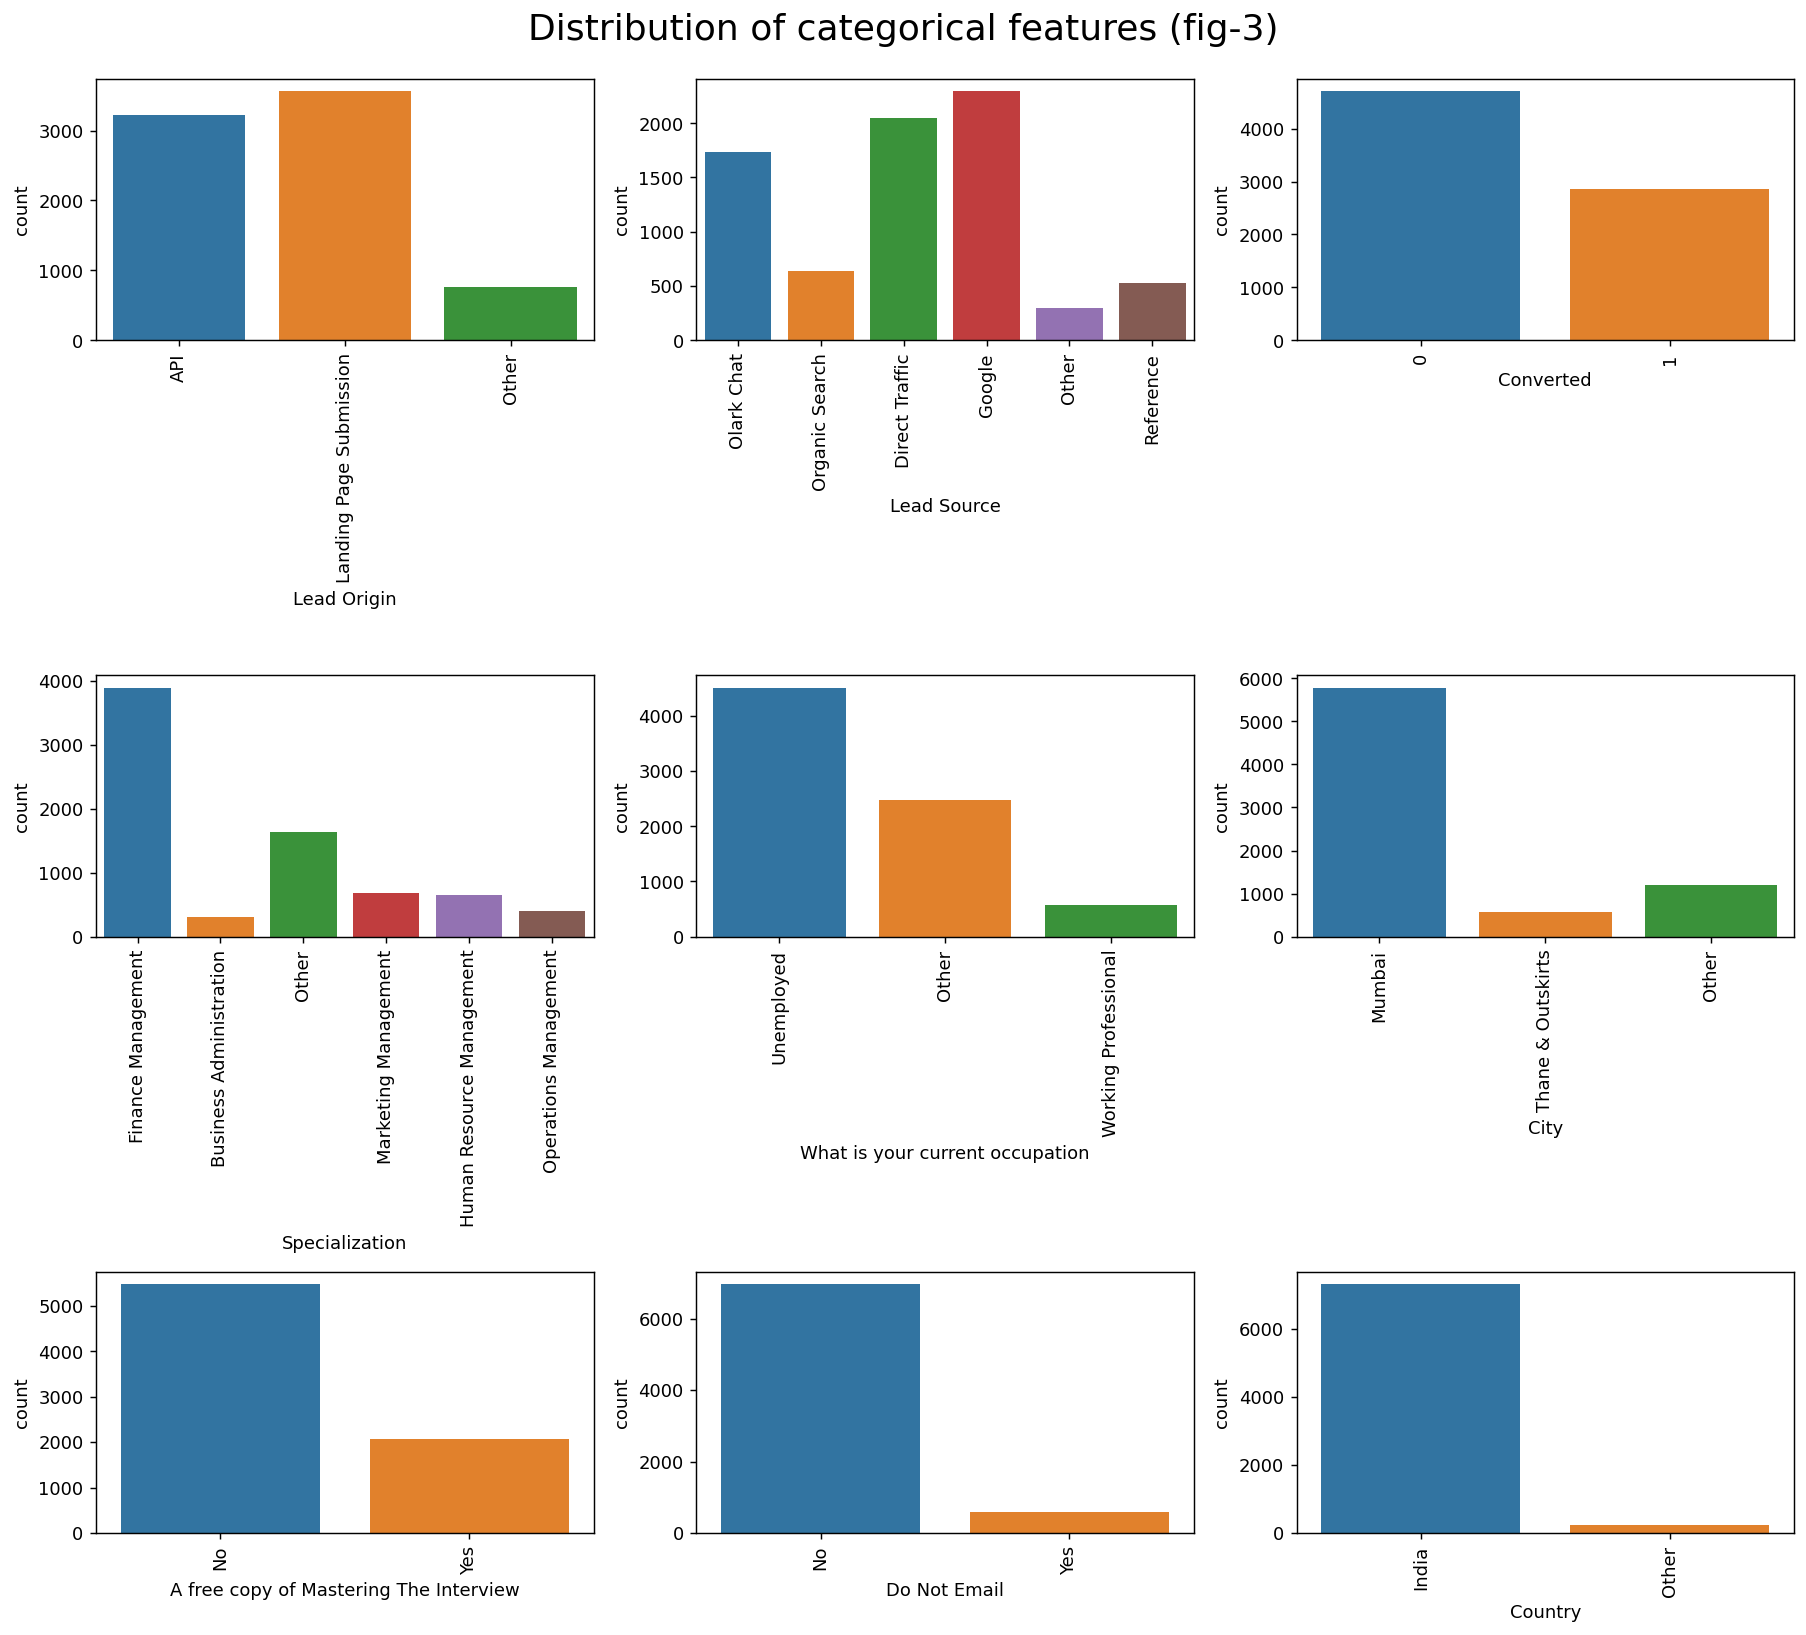

In [ ]:
cat_features = ['Lead Origin', 'Lead Source', 'Converted', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview',"Do Not Email","Country"]
plt.figure(figsize=(14,12),dpi=130)
plt.suptitle("Distribution of categorical features (fig-3)",fontsize=20, y= 1.03)
for i,col_name in enumerate(cat_features):
    plt.subplot(3,3,i+1,)
    sns.countplot(leads_df[col_name])
    plt.tight_layout()
    plt.xticks(rotation=90)
plt.show()

#### From fig-3 we can see that:
- <b>Lead Origin : </b>Major customers come from API and Landing Page Submissions and a very few customers have other origins.
- <b>Lead Source : </b>Major customers come from Google searches and significant number of customers also come directly to the website. Very few customers come from other sources.
- <b>Converted : </b>Majority of the customers in the dataset are not converted.
- <b>Specialization : </b>Majority of the customers come from Financial Management specialization ad there are significant number of customers who come from other unlisted specializations.
- <b>Current Occupation : </b>Majority of the customers are unemployed, there are a very few working professionals.And there are signiifcant number of customers with unlisted other occupations.
- <b>City : </b> Majority of the customers come form Maumbai and there are very few customers from others places or cities.
- <b>A free copy of Mastering The Interview : </b> Majority of the customers do not want a free copy of Mastering The Interview.

## Bivariate Analysis

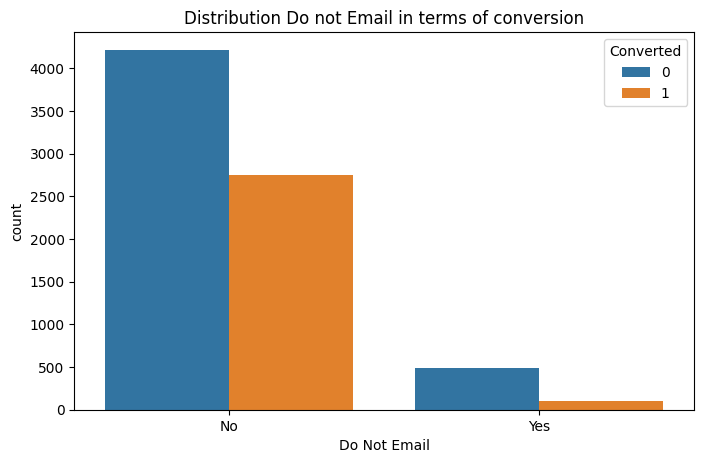

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("Distribution Do not Email in terms of conversion")
sns.countplot(data=leads_df,x="Do Not Email",hue="Converted")
plt.show()

- There are highest number of leads who have not enabled Do not Email

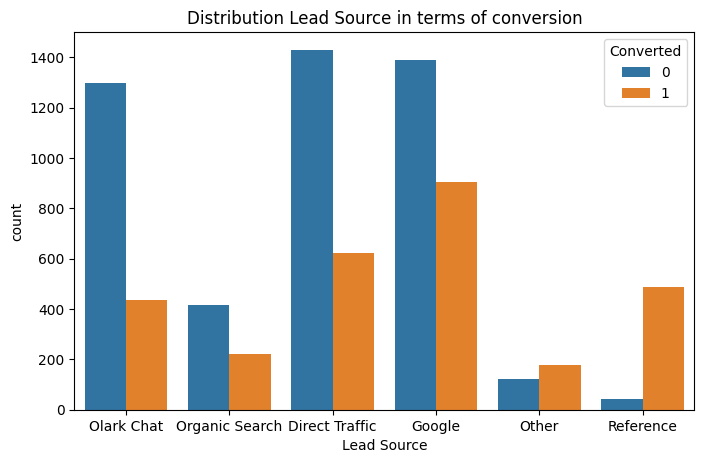

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("Distribution Lead Source in terms of conversion")
sns.countplot(data=leads_df,x="Lead Source",hue="Converted")
plt.show()

#### From fig we can see that : 
- Although customers coming from google searches have a good conversion ratio but the conversion rate is the highest for the customers caoming from other unlisted sources.

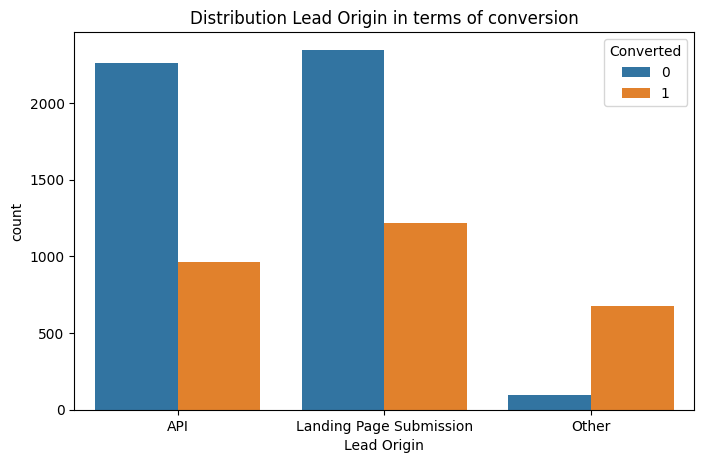

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("Distribution Lead Origin in terms of conversion")
sns.countplot(data=leads_df,x="Lead Origin",hue="Converted")
plt.show()

#### From fig we can see that : 
- Customers coming from other unlisted origins have the highest conversion ratio.

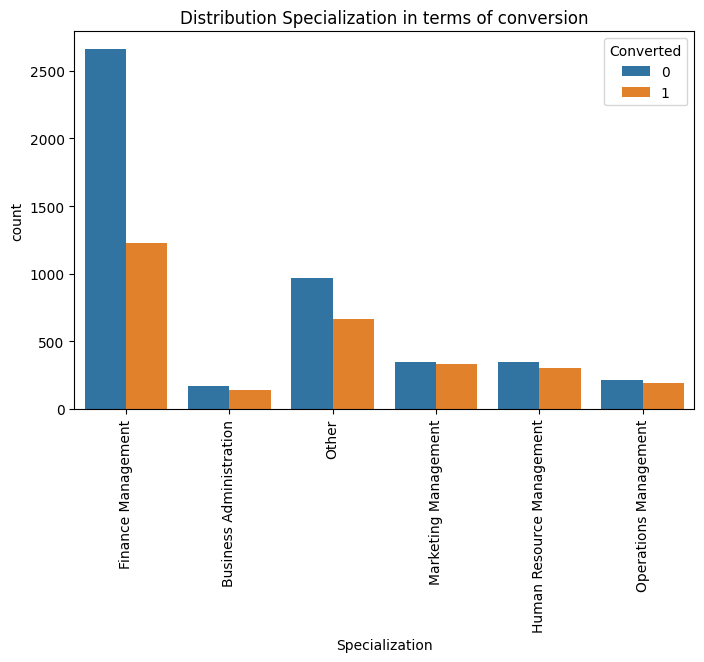

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("Distribution Specialization in terms of conversion")
sns.countplot(data=leads_df,x="Specialization",hue="Converted")
plt.xticks(rotation  = 90)
plt.show()

- Most of the leads come from Financial Management Specialization.

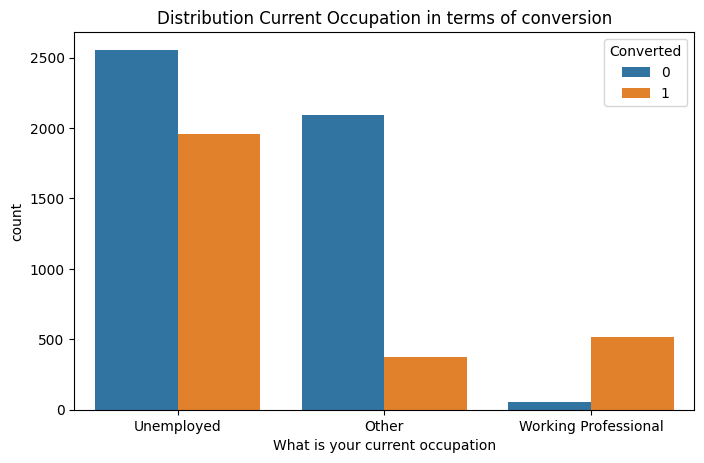

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("Distribution Current Occupation in terms of conversion")
sns.countplot(data=leads_df,x="What is your current occupation",hue="Converted")
plt.show()

- Working professionals have more conversion rate.
- There are highest number of leads from unemployed.

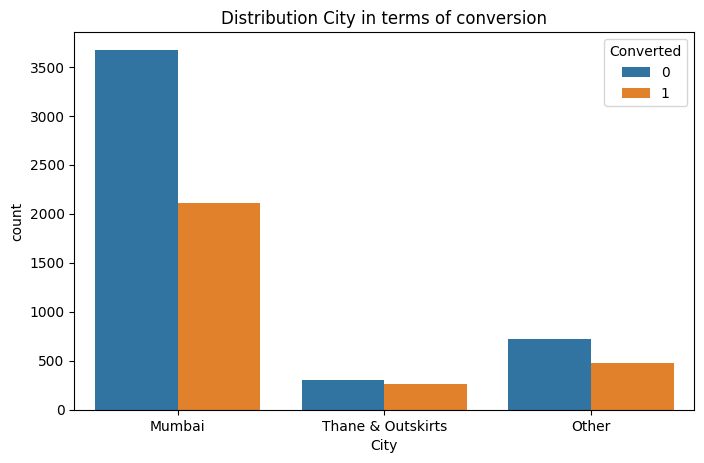

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("Distribution City in terms of conversion")
sns.countplot(data=leads_df,x="City",hue="Converted")
plt.show()

- Mumbai has greater number of leads. 

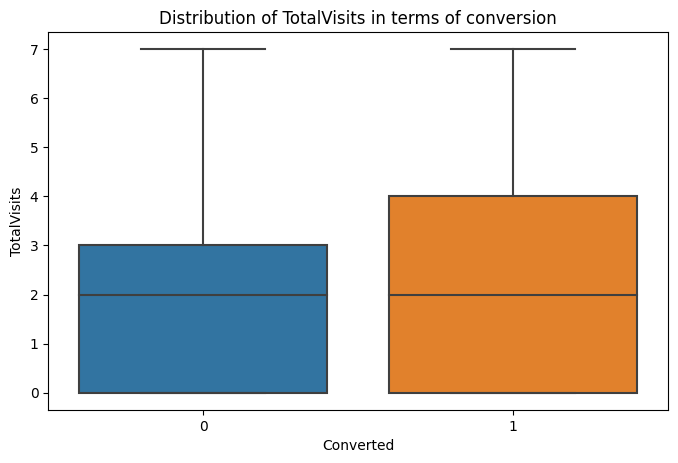

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("Distribution of TotalVisits in terms of conversion")
sns.boxplot(data=leads_df,y="TotalVisits",x="Converted")
plt.show()

- Not much effect on converted.
- Mean for both converted and non converted leads are same.

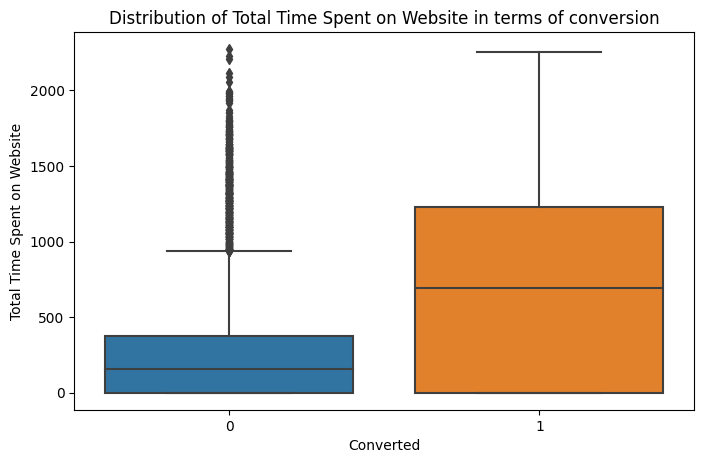

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("Distribution of Total Time Spent on Website in terms of conversion")
sns.boxplot(data=leads_df,y="Total Time Spent on Website",x="Converted")
plt.show()

- More the Total time spent on webisite, more likely to convert.

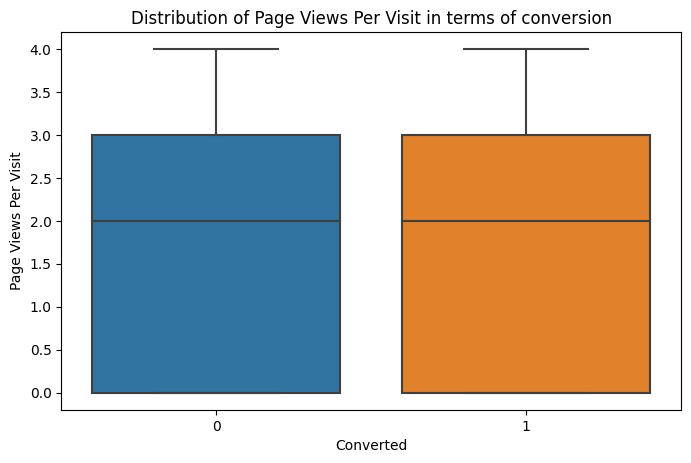

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("Distribution of Page Views Per Visit in terms of conversion")
sns.boxplot(data=leads_df,y="Page Views Per Visit",x="Converted")
plt.show()

- Not much effect on Converted

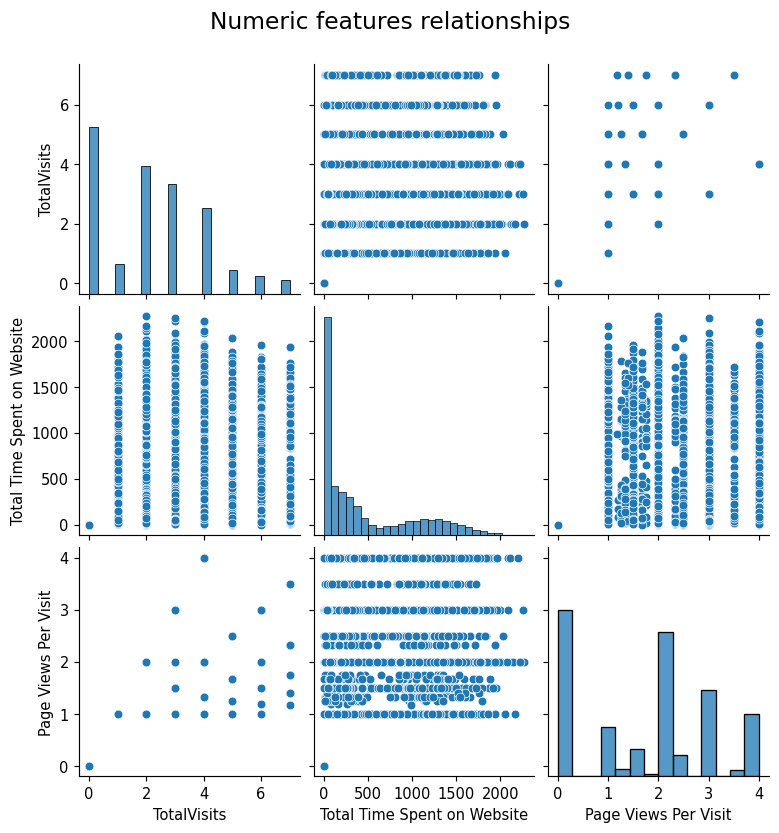

In [ ]:
ax = sns.pairplot(leads_df[num_features])
fig = ax.fig
fig.suptitle("Numeric features relationships",fontsize=16,y=1.05)
fig.dpi = 105
plt.show()

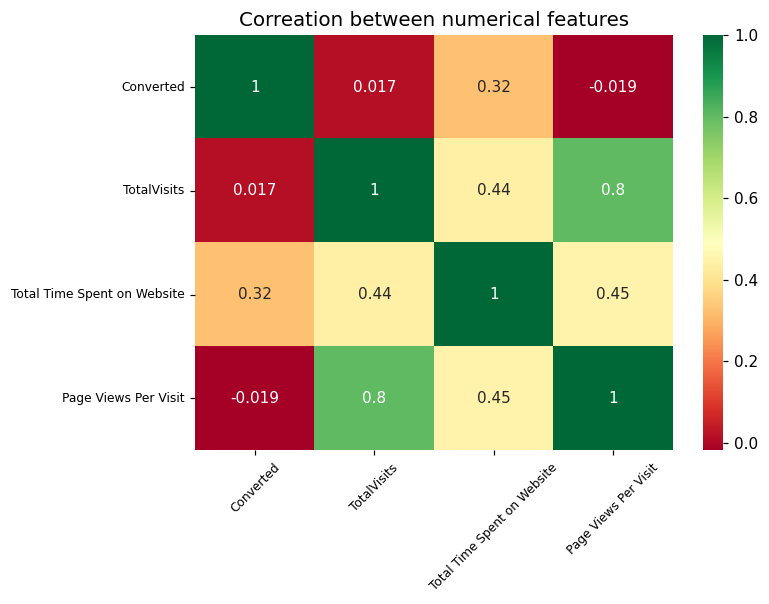

In [ ]:
plt.figure(figsize=(7,5),dpi=110)
plt.title("Correation between numerical features",fontsize=13)
sns.heatmap(leads_df.corr(),cmap="RdYlGn",annot=True)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=45)
plt.show()

- We can see that Page views per Visit is highly correlated with TotalVisits.
- For other features there is not much significant correlations

# Data preparation for Model building

## Create Dummy variables for categorical features

In [ ]:
cat_features = ['Lead Origin',
 'Lead Source',
 'Specialization',
 'What is your current occupation',
 'City']

leads_df_dummy = pd.get_dummies(data=leads_df,columns=cat_features,drop_first=True)

In [ ]:
leads_df_dummy.Country.replace({"India":1,"Other":0},inplace=True)

In [ ]:
leads_df_dummy.rename(columns={"Country":"Country_India"},inplace=True)

In [ ]:
leads_df_dummy["Do Not Email"].replace({"Yes":1,"No":0},inplace=True)

In [ ]:
leads_df_dummy["A free copy of Mastering The Interview"].replace({"Yes":1,"No":0},inplace=True)

In [ ]:
leads_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7551 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          7551 non-null   int64  
 1   Converted                                             7551 non-null   int64  
 2   TotalVisits                                           7551 non-null   float64
 3   Total Time Spent on Website                           7551 non-null   int64  
 4   Page Views Per Visit                                  7551 non-null   float64
 5   Country_India                                         7551 non-null   int64  
 6   A free copy of Mastering The Interview                7551 non-null   int64  
 7   Lead Origin_Landing Page Submission                   7551 non-null   uint8  
 8   Lead Origin_Other                                     7551

## Splitting data into test and train

In [ ]:
from sklearn.model_selection import train_test_split
leads_df_train,leads_df_test = train_test_split(leads_df_dummy,test_size=0.3,random_state = 100)

In [ ]:
y_train = leads_df_train.pop("Converted")
X_train = leads_df_train
y_test = leads_df_test.pop("Converted")
X_test = leads_df_test

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)

## Feature Selection using RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()
rfe = RFE(lm,n_features_to_select= 17)
rfe = rfe.fit(X_train_scaled,y_train)

In [ ]:
pd.DataFrame({"Feature":X_train_scaled.columns,
              "Ranking":rfe.ranking_,
              "Support":rfe.support_}).sort_values(by="Ranking")

,Feature,Ranking,Support
0,Do Not Email,1,True
19,What is your current occupation_Working Profes...,1,True
18,What is your current occupation_Unemployed,1,True
14,Specialization_Human Resource Management,1,True
13,Specialization_Finance Management,1,True
12,Lead Source_Reference,1,True
20,City_Other,1,True
9,Lead Source_Olark Chat,1,True
10,Lead Source_Organic Search,1,True
7,Lead Origin_Other,1,True


In [ ]:
X_train_1 = X_train_scaled.loc[:,rfe.support_]

In [ ]:
pd.DataFrame(X_train_1.columns,columns=["Features"])

,Features
0,Do Not Email
1,TotalVisits
2,Total Time Spent on Website
3,Page Views Per Visit
4,A free copy of Mastering The Interview
5,Lead Origin_Landing Page Submission
6,Lead Origin_Other
7,Lead Source_Google
8,Lead Source_Olark Chat
9,Lead Source_Organic Search


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def get_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

## Assessing model with  Stats Model

In [ ]:
logm1 = sm.GLM(y_train,sm.add_constant(X_train_1), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5285
Model:                            GLM   Df Residuals:                     5267
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2398.3
Date:                Tue, 19 Jul 2022   Deviance:                       4796.7
Time:                        09:56:57   Pearson chi2:                 5.86e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6201      0.039    -15.895      0.000      -0.697      -0.544
Do Not Email                                            -0.3057      0.046     -6.686      0.000      -0.395      -0.216
TotalVisits                                              0.1637      0.061      2.667      0.008       0.043       0.284
Total Time Spent on Website                              1.0302      0.043     23.826      0.000       0.945       1.115
Page Views Per Visit                                    -0.2011      0.073     -2.770      0.006      -0.343      -0.059
A free copy of Mastering The Interview                  -0.0470      0.055     -0.862      0.388      -0.154       0.060
Lead Origin_Landing Page Submission                     -0.1045      0.065     -1.609      0.108      -0.232       0.023
Lead Origin_Other                                        0.9099      0.070     12.943      0.000       0.772       1.048
Lead Source_Google                                       0.1618      0.057      2.859      0.004       0.051       0.273
Lead Source_Olark Chat                                   0.5313      0.072      7.346      0.000       0.390       0.673
Lead Source_Organic Search                               0.0635      0.042      1.501      0.133      -0.019       0.146
Lead Source_Reference                                    0.1455      0.069      2.110      0.035       0.010       0.281
Specialization_Finance Management                       -0.2643      0.051     -5.159      0.000      -0.365      -0.164
Specialization_Human Resource Management                -0.0708      0.038     -1.880      0.060      -0.145       0.003
What is your current occupation_Unemployed               0.5988      0.043     13.986      0.000       0.515       0.683
What is your current occupation_Working Professional     0.9276      0.054     17.213      0.000       0.822       1.033
City_Other                                               0.0541      0.039      1.370      0.171      -0.023       0.131
City_Thane & Outskirts                                   0.0427      0.037      1.160      0.246      -0.029       0.115
========================================================================================================================
"""

In [ ]:
from sklearn.metrics import accuracy_score
def get_accuracy_score(res,X_train):
    y_train_pred = (res.predict(sm.add_constant(X_train))>0.5).astype(int)
    return accuracy_score(y_train,y_train_pred)

In [ ]:
get_accuracy_score(res,X_train_1)

0.7909176915799432

In [ ]:
get_vif(X_train_1)

,Features,VIF
3,Page Views Per Visit,4.09
6,Lead Origin_Other,4.00
8,Lead Source_Olark Chat,3.83
5,Lead Origin_Landing Page Submission,3.35
1,TotalVisits,3.07
10,Lead Source_Reference,3.06
7,Lead Source_Google,2.50
4,A free copy of Mastering The Interview,2.28
11,Specialization_Finance Management,1.99
9,Lead Source_Organic Search,1.44


- `A free copy of Mastering The Interview` clearly has a high p value of 0.388 , so drop it

In [ ]:
X_train_2 = X_train_1.drop(columns="A free copy of Mastering The Interview")

In [ ]:
logm2 = sm.GLM(y_train,sm.add_constant(X_train_2), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5285
Model:                            GLM   Df Residuals:                     5268
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2398.7
Date:                Tue, 19 Jul 2022   Deviance:                       4797.4
Time:                        09:56:57   Pearson chi2:                 5.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6196      0.039    -15.885      0.000      -0.696      -0.543
Do Not Email                                            -0.3043      0.046     -6.655      0.000      -0.394      -0.215
TotalVisits                                              0.1589      0.061      2.597      0.009       0.039       0.279
Total Time Spent on Website                              1.0298      0.043     23.816      0.000       0.945       1.115
Page Views Per Visit                                    -0.1955      0.072     -2.704      0.007      -0.337      -0.054
Lead Origin_Landing Page Submission                     -0.1181      0.063     -1.871      0.061      -0.242       0.006
Lead Origin_Other                                        0.9212      0.069     13.330      0.000       0.786       1.057
Lead Source_Google                                       0.1883      0.048      3.954      0.000       0.095       0.282
Lead Source_Olark Chat                                   0.5499      0.069      7.949      0.000       0.414       0.685
Lead Source_Organic Search                               0.0700      0.042      1.680      0.093      -0.012       0.152
Lead Source_Reference                                    0.1480      0.069      2.150      0.032       0.013       0.283
Specialization_Finance Management                       -0.2589      0.051     -5.093      0.000      -0.359      -0.159
Specialization_Human Resource Management                -0.0704      0.038     -1.871      0.061      -0.144       0.003
What is your current occupation_Unemployed               0.5985      0.043     13.981      0.000       0.515       0.682
What is your current occupation_Working Professional     0.9290      0.054     17.232      0.000       0.823       1.035
City_Other                                               0.0514      0.039      1.306      0.191      -0.026       0.128
City_Thane & Outskirts                                   0.0441      0.037      1.199      0.231      -0.028       0.116
========================================================================================================================
"""

In [ ]:
get_accuracy_score(res,X_train_2)

0.7899716177861873

In [ ]:
get_vif(X_train_2)

,Features,VIF
3,Page Views Per Visit,4.07
5,Lead Origin_Other,3.87
7,Lead Source_Olark Chat,3.50
4,Lead Origin_Landing Page Submission,3.15
1,TotalVisits,3.05
9,Lead Source_Reference,3.05
10,Specialization_Finance Management,1.97
6,Lead Source_Google,1.80
8,Lead Source_Organic Search,1.40
13,What is your current occupation_Working Profes...,1.36


- `City_Thane & Outskirt ` clearly has a high p value of 0.231, so drop it.

In [ ]:
X_train_3 = X_train_2.drop(columns="City_Thane & Outskirts")

In [ ]:
logm3 = sm.GLM(y_train,sm.add_constant(X_train_3), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5285
Model:                            GLM   Df Residuals:                     5269
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2399.4
Date:                Tue, 19 Jul 2022   Deviance:                       4798.9
Time:                        09:56:58   Pearson chi2:                 5.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6192      0.039    -15.877      0.000      -0.696      -0.543
Do Not Email                                            -0.3048      0.046     -6.665      0.000      -0.394      -0.215
TotalVisits                                              0.1609      0.061      2.632      0.008       0.041       0.281
Total Time Spent on Website                              1.0309      0.043     23.849      0.000       0.946       1.116
Page Views Per Visit                                    -0.1959      0.072     -2.709      0.007      -0.338      -0.054
Lead Origin_Landing Page Submission                     -0.1106      0.063     -1.763      0.078      -0.234       0.012
Lead Origin_Other                                        0.9226      0.069     13.353      0.000       0.787       1.058
Lead Source_Google                                       0.1901      0.048      3.995      0.000       0.097       0.283
Lead Source_Olark Chat                                   0.5518      0.069      7.980      0.000       0.416       0.687
Lead Source_Organic Search                               0.0692      0.042      1.662      0.097      -0.012       0.151
Lead Source_Reference                                    0.1513      0.069      2.199      0.028       0.016       0.286
Specialization_Finance Management                       -0.2647      0.051     -5.230      0.000      -0.364      -0.165
Specialization_Human Resource Management                -0.0707      0.038     -1.878      0.060      -0.144       0.003
What is your current occupation_Unemployed               0.6000      0.043     14.024      0.000       0.516       0.684
What is your current occupation_Working Professional     0.9291      0.054     17.230      0.000       0.823       1.035
City_Other                                               0.0417      0.038      1.084      0.279      -0.034       0.117
========================================================================================================================
"""

In [ ]:
get_accuracy_score(res,X_train_3)

0.7894039735099337

In [ ]:
get_vif(X_train_3)

,Features,VIF
3,Page Views Per Visit,4.07
5,Lead Origin_Other,3.87
7,Lead Source_Olark Chat,3.50
4,Lead Origin_Landing Page Submission,3.11
1,TotalVisits,3.05
9,Lead Source_Reference,3.05
10,Specialization_Finance Management,1.95
6,Lead Source_Google,1.80
8,Lead Source_Organic Search,1.40
13,What is your current occupation_Working Profes...,1.36


- `City_Other` has a high p value of 0.279, so drop it.

In [ ]:
X_train_4 = X_train_3.drop(columns="City_Other")

In [ ]:
logm4 = sm.GLM(y_train,sm.add_constant(X_train_4), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5285
Model:                            GLM   Df Residuals:                     5270
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2400.0
Date:                Tue, 19 Jul 2022   Deviance:                       4800.0
Time:                        09:56:58   Pearson chi2:                 5.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6189      0.039    -15.870      0.000      -0.695      -0.542
Do Not Email                                            -0.3050      0.046     -6.670      0.000      -0.395      -0.215
TotalVisits                                              0.1596      0.061      2.612      0.009       0.040       0.279
Total Time Spent on Website                              1.0323      0.043     23.892      0.000       0.948       1.117
Page Views Per Visit                                    -0.1941      0.072     -2.686      0.007      -0.336      -0.052
Lead Origin_Landing Page Submission                     -0.1037      0.062     -1.662      0.097      -0.226       0.019
Lead Origin_Other                                        0.9242      0.069     13.382      0.000       0.789       1.060
Lead Source_Google                                       0.1826      0.047      3.880      0.000       0.090       0.275
Lead Source_Olark Chat                                   0.5488      0.069      7.947      0.000       0.413       0.684
Lead Source_Organic Search                               0.0694      0.042      1.667      0.096      -0.012       0.151
Lead Source_Reference                                    0.1474      0.069      2.145      0.032       0.013       0.282
Specialization_Finance Management                       -0.2725      0.050     -5.438      0.000      -0.371      -0.174
Specialization_Human Resource Management                -0.0718      0.038     -1.908      0.056      -0.145       0.002
What is your current occupation_Unemployed               0.6004      0.043     14.031      0.000       0.517       0.684
What is your current occupation_Working Professional     0.9295      0.054     17.225      0.000       0.824       1.035
========================================================================================================================
"""

In [ ]:
get_accuracy_score(res,X_train_4)

0.7892147587511826

In [ ]:
get_vif(X_train_4)

,Features,VIF
3,Page Views Per Visit,4.07
5,Lead Origin_Other,3.87
7,Lead Source_Olark Chat,3.50
4,Lead Origin_Landing Page Submission,3.07
1,TotalVisits,3.05
9,Lead Source_Reference,3.04
10,Specialization_Finance Management,1.92
6,Lead Source_Google,1.77
8,Lead Source_Organic Search,1.40
13,What is your current occupation_Working Profes...,1.36


- `Lead Origin_Landing Page Submission` has a high p value of 0.097, so drop it

In [ ]:
X_train_5 = X_train_4.drop(columns="Lead Origin_Landing Page Submission")

In [ ]:
logm5 = sm.GLM(y_train,sm.add_constant(X_train_5), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5285
Model:                            GLM   Df Residuals:                     5271
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2401.4
Date:                Tue, 19 Jul 2022   Deviance:                       4802.8
Time:                        09:56:58   Pearson chi2:                 5.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6207      0.039    -15.923      0.000      -0.697      -0.544
Do Not Email                                            -0.3073      0.046     -6.719      0.000      -0.397      -0.218
TotalVisits                                              0.1590      0.061      2.603      0.009       0.039       0.279
Total Time Spent on Website                              1.0363      0.043     24.005      0.000       0.952       1.121
Page Views Per Visit                                    -0.2215      0.070     -3.144      0.002      -0.360      -0.083
Lead Origin_Other                                        0.9536      0.067     14.271      0.000       0.823       1.085
Lead Source_Google                                       0.2098      0.044      4.751      0.000       0.123       0.296
Lead Source_Olark Chat                                   0.5925      0.064      9.260      0.000       0.467       0.718
Lead Source_Organic Search                               0.0909      0.040      2.296      0.022       0.013       0.168
Lead Source_Reference                                    0.1554      0.068      2.268      0.023       0.021       0.290
Specialization_Finance Management                       -0.2346      0.044     -5.276      0.000      -0.322      -0.147
Specialization_Human Resource Management                -0.0698      0.037     -1.861      0.063      -0.143       0.004
What is your current occupation_Unemployed               0.6002      0.043     14.036      0.000       0.516       0.684
What is your current occupation_Working Professional     0.9298      0.054     17.263      0.000       0.824       1.035
========================================================================================================================
"""

In [ ]:
get_accuracy_score(res,X_train_5)

0.7882686849574266

In [ ]:
get_vif(X_train_5)

,Features,VIF
3,Page Views Per Visit,3.87
4,Lead Origin_Other,3.59
1,TotalVisits,3.05
8,Lead Source_Reference,3.01
6,Lead Source_Olark Chat,2.92
5,Lead Source_Google,1.53
9,Specialization_Finance Management,1.53
12,What is your current occupation_Working Profes...,1.35
2,Total Time Spent on Website,1.34
7,Lead Source_Organic Search,1.26


- `Specialization_Human Resource Management` has a high p value of 0.063, so drop it.

In [ ]:
X_train_6 = X_train_5.drop(columns="Specialization_Human Resource Management")

In [ ]:
logm6 = sm.GLM(y_train,sm.add_constant(X_train_6), family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5285
Model:                            GLM   Df Residuals:                     5272
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2403.1
Date:                Tue, 19 Jul 2022   Deviance:                       4806.3
Time:                        09:56:59   Pearson chi2:                 5.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6212      0.039    -15.937      0.000      -0.698      -0.545
Do Not Email                                            -0.3051      0.046     -6.668      0.000      -0.395      -0.215
TotalVisits                                              0.1586      0.061      2.600      0.009       0.039       0.278
Total Time Spent on Website                              1.0348      0.043     24.008      0.000       0.950       1.119
Page Views Per Visit                                    -0.2247      0.070     -3.191      0.001      -0.363      -0.087
Lead Origin_Other                                        0.9489      0.067     14.213      0.000       0.818       1.080
Lead Source_Google                                       0.2074      0.044      4.704      0.000       0.121       0.294
Lead Source_Olark Chat                                   0.5879      0.064      9.204      0.000       0.463       0.713
Lead Source_Organic Search                               0.0919      0.040      2.322      0.020       0.014       0.169
Lead Source_Reference                                    0.1551      0.069      2.264      0.024       0.021       0.289
Specialization_Finance Management                       -0.2113      0.043     -4.950      0.000      -0.295      -0.128
What is your current occupation_Unemployed               0.5996      0.043     14.021      0.000       0.516       0.683
What is your current occupation_Working Professional     0.9287      0.054     17.255      0.000       0.823       1.034
========================================================================================================================
"""

In [ ]:
get_accuracy_score(res,X_train_6)

0.7886471144749291

In [ ]:
get_vif(X_train_6)

,Features,VIF
3,Page Views Per Visit,3.87
4,Lead Origin_Other,3.58
1,TotalVisits,3.05
8,Lead Source_Reference,3.01
6,Lead Source_Olark Chat,2.92
5,Lead Source_Google,1.53
9,Specialization_Finance Management,1.41
11,What is your current occupation_Working Profes...,1.35
2,Total Time Spent on Website,1.34
7,Lead Source_Organic Search,1.26


- We can see that `vif` and `p values` of the features in the final model have been stabilized, so we can now end the feature selection process.

## Analyze the final result on the train data

In [ ]:
final_res = res
X_train_final = X_train_6

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
y_train_pred_prob = final_res.predict(sm.add_constant(X_train_final))
y_train_pred_final = (y_train_pred_prob>0.5).astype(int)
confusion = confusion_matrix(y_train,y_train_pred_final)

In [ ]:
#Overall accuracy
get_accuracy_score(final_res,X_train_final)

0.7886471144749291

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
confusion

array([[2938,  373],
       [ 744, 1230]])

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6231003039513677

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8873452129266083

## Plotting ROC curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

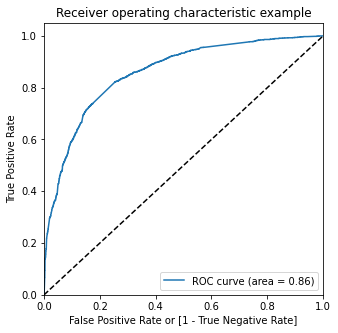

In [ ]:
draw_roc(y_train, y_train_pred_prob)

## Find cut off probability 

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train, (y_train_pred_prob>i).astype(int) )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373510  1.000000  0.000000
0.1   0.1  0.509934  0.984296  0.227122
0.2   0.2  0.708231  0.898176  0.594986
0.3   0.3  0.766131  0.831307  0.727273
0.4   0.4  0.798108  0.701621  0.855633
0.5   0.5  0.788647  0.623100  0.887345
0.6   0.6  0.779754  0.555724  0.913319
0.7   0.7  0.763860  0.465046  0.942011
0.8   0.8  0.731883  0.329787  0.971610
0.9   0.9  0.686471  0.171733  0.993355


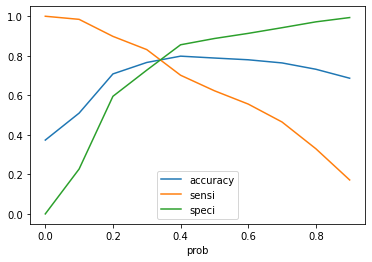

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [ ]:
# Final Accuracy score 
accuracy_score(y_train,(y_train_pred_prob>0.35).astype(int))

0.795837275307474

# Analyzing accuracy on the test data

In [ ]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns= X_test.columns)

In [ ]:
X_test_scaled = X_test_scaled[X_train_final.columns] 

In [ ]:
y_test_prob = final_res.predict(sm.add_constant(X_test_scaled))

In [ ]:
#Test accuracy
y_test_pred = (y_test_prob>0.35).astype(int)
accuracy_score(y_test,y_test_pred)

0.8045013239187997

In [ ]:
confusion = confusion_matrix(y_test,y_test_pred)
confusion

array([[1171,  220],
       [ 223,  652]])

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7451428571428571

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8418404025880661

In [ ]:
lead_score = round(final_res.predict(sm.add_constant(leads_df_dummy[X_train_final.columns]))*100,2)

In [ ]:
leads_df["Lead Score"] = lead_score

# Calculating the Lead Score

In [ ]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Score
0,API,Olark Chat,No,0,0.0,0,0.0,India,Finance Management,Unemployed,Mumbai,No,58.78
1,API,Organic Search,No,0,5.0,674,2.5,India,Finance Management,Unemployed,Mumbai,No,100.00
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Other,Mumbai,Yes,100.00
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Other,Unemployed,Mumbai,No,100.00
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,Finance Management,Unemployed,Mumbai,No,100.00
